# STEP 1 :- Web Scraping

#### 1) Importing Libraries

In [175]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys #sending text to input box
import matplotlib.pyplot as plt
import seaborn as sns

#### 2) Code to scrape data

In [2]:
df = pd.DataFrame({'Name':[''], 'Speciality':[''], 'Degree':[''], 'Year_of_experience':[''] , 'Location':[''] , 'City':[''] ,'dp_score':[''], 'npv':[''], 'consultation_fee':[''], 'Link':['']})
lis=['Bangalore','Chennai','Delhi','Hyderabad','Mumbai','Pune']
Speciality = 'Cardiologist'
for i in lis:
    driver = webdriver.Chrome()
    url = f'https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22cardiologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={i}'
    driver.get(url)
    time.sleep(2)
    
    scroll_pause_time = 2 # You can set your own pause time. dont slow too slow that might not able to load more data
    screen_height = driver.execute_script("return window.screen.height;")  # get the screen height of the web
    A = 1

    while True:
        # scroll one screen height each time
        driver.execute_script("window.scrollTo(0, {screen_height}*{A});".format(screen_height=screen_height, A=A))
        A += 1
        time.sleep(scroll_pause_time)
        # update scroll height each time after scrolled, as the scroll height can change after we scrolled the page
        scroll_height = driver.execute_script("return document.body.scrollHeight;")
        # Break the loop when the height we need to scroll to is larger than the total scroll height
        if (screen_height) * A > scroll_height:
            break

    soup = BeautifulSoup(driver.page_source,'lxml')
    postings = soup.find_all('div' , class_= 'u-border-general--bottom')
    for post in postings:
        try:
            link = post.find('div' , class_ = 'listing-doctor-card').find('a').get('href')
            link_full = 'https://www.practo.com'+link
            driver.get(link_full)
            soup2 = BeautifulSoup(driver.page_source,'lxml')

            #extracting name
            try:
                name = soup2.find('h1' , class_ = 'c-profile__title u-bold u-d-inlineblock').text
            except:
                pass       
            #extracting degree
            try:
                Degree = soup2.find('p' , class_ = 'c-profile__details').text
            except:
                pass
            #extracting years of experience
            try:
                Year_of_experience = soup2.find('div' , class_ = 'c-profile__details').find_all('h2')[-1].text
            except:
                pass
            #extracting location
            try:
                Location = soup2.find('h4' , class_ = 'c-profile--clinic__location').text
            except:
                pass
            #extracting dp score
            try:
                dp_score = soup2.find('span' , class_ = 'u-green-text u-bold u-large-font').text.strip()
            except:
                pass
            #extracting npv
            try:
                npv = soup2.find('span' , class_ = 'u-smallest-font u-grey_3-text').text
            except:
                pass
            #extracting consulting fee
            try:
                consultant_fee = soup2.find('span' , class_ = 'u-strike').text.strip()
            except:
                consultant_fee = soup2.find('div' , class_ = 'u-f-right u-large-font u-bold u-valign--middle u-lheight-normal').text.strip()

            df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
        except:
            pass

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Name':name, 'Speciality':Speciality, 'Degree':Degree, 'Year_of_experience':Year_of_experience , 'Location':Location , 'City':i ,'dp_score':dp_score, 'npv':npv, 'consultation_fee':consultant_fee, 'Link':link_full} , ignore_index = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1660\3003455230.py:70: FutureWarning: The frame.append 

In [6]:
df.head()

,Name,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee,Link
0,,,,,,,,,,
1,Dr. B. Ramesh,Cardiologist,"DM - Cardiology, MD - General Medicine, MBBS",37 Years Experience Overall (32 years as spec...,"Bannerghatta Road, Bangalore",Bangalore,98%,(986 votes),₹ 1000 fee,https://www.practo.com/bangalore/doctor/dr-ram...
2,Dr. Sunil Kumar S,Cardiologist,"MBBS, MD - General Medicine, DM - Cardiology, ...",19 Years Experience Overall (9 years as speci...,"Hebbal, Bangalore",Bangalore,100%,(45 votes),₹ 1000 fee,https://www.practo.com/bangalore/doctor/dr-sun...
3,Dr. Venkatesh S,Cardiologist,"MBBS, MD - Medicine, DM - Cardiology",29 Years Experience Overall (19 years as spec...,"JP Nagar, Bangalore",Bangalore,97%,(36 votes),₹ 1050 fee,https://www.practo.com/bangalore/doctor/dr-ven...
4,Dr. K P Srihari Das,Cardiologist,"MBBS, MD - General Medicine, DM - Cardiology",29 Years Experience Overall (18 years as spec...,"Jayanagar 9 Block, Bangalore",Bangalore,97%,(62 votes),₹ 750 fee,https://www.practo.com/bangalore/doctor/dr-k-p...


In [8]:
df.shape

(372, 10)

#### 3) Exporting dataframe(df) as CSV file

In [4]:
df.to_csv('Cardiologist.csv', index=False)

#### Similarly we can extract data for other speciality by doing some changes in this code:
##### In line 3, assign the name of speciality to 'Speciality' variable.
##### In line 6, assign the url of that speciality to 'url' variable. (url are given below for each speciality)

Specialities: Cardiologist,Chiropractor,Dentist,Dermatologist,Dietitian,Gastroenterologist,Gynecologist,Infertility Specialist, Neurologist,Neurosurgeon,Ophthalmologist,Orthopedist,Pediatrician,Physiotherapist,Psychiatrist,Pulmonologist,Rheumatologists, Urologist

Cardiologist,Chiropractor,Dentist,Dermatologist,Dietitian,Gastroenterologist,Gynecologist,Infertility Specialist, Neurologist,Neurosurgeon,Ophthalmologist,Orthopedist,Pediatrician,Physiotherapist,Psychiatrist,Pulmonologist,Rheumatologists, Urologist

# STEP 2:- Concat all the CSV files

In [88]:
df2 = pd.concat(
    map(pd.read_csv, ['Cardiologist.csv','Chiropractor.csv','Dentist.csv','Dermatologist.csv','Dietitian.csv','Gastroenterologist.csv','Gynecologist.csv','Infertility Specialist.csv', 'Neurologist.csv','Neurosurgeon.csv','Ophthalmologist.csv','Orthopedist.csv','Pediatrician.csv','Physiotherapist.csv','Psychiatrist.csv','Pulmonologist.csv','Rheumatologists.csv', 'Urologist.csv']), ignore_index=True)

In [89]:
df2

,Unnamed: 0,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5 Years Experience Overall,Cardiologist,"HSR Layout, Bangalore",Bangalore,96%,(28 votes),₹700
1,1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23 Years Experience Overall (11 years as spec...,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95%,(172 votes),₹650
2,2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12 Years Experience Overall (6 years as speci...,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,₹750
3,3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15 Years Experience Overall,Cardiologist,"Yelahanka, Bangalore",Bangalore,90%,(101 votes),₹500
4,4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21 Years Experience Overall (5 years as speci...,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100%,(19 votes),₹600
...,...,...,...,...,...,...,...,...,...,...
8970,235,Dr. Hemnath U A,"MBBS, MS - General Surgery, MCh - Urology",12 Years Experience Overall (3 years as speci...,Urologist,"Kondapur, Hyderabad",Hyderabad,0,0,₹500
8971,236,Dr. P Praneeth,"MBBS, MS - General Surgery, MCh - Urology",4 Years Experience Overall (2 years as specia...,Urologist,"Manikonda, Hyderabad",Hyderabad,0,0,₹600
8972,237,Dr. Venu,"MBBS, DNB - Urology/Genito - Urinary Surgery",25 Years Experience Overall (7 years as speci...,Urologist,"LB Nagar, Hyderabad",Hyderabad,0,0,₹680
8973,238,Dr. Leela krishna Karri,"MBBS, MS - General Surgery, MCh - Urology",11 Years Experience Overall (2 years as speci...,Urologist,"Hitech City, Hyderabad",Hyderabad,0,0,₹700


# STEP 3:- Data Cleaning

In [90]:
df2.head()

,Unnamed: 0,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5 Years Experience Overall,Cardiologist,"HSR Layout, Bangalore",Bangalore,96%,(28 votes),₹700
1,1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23 Years Experience Overall (11 years as spec...,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95%,(172 votes),₹650
2,2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12 Years Experience Overall (6 years as speci...,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,₹750
3,3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15 Years Experience Overall,Cardiologist,"Yelahanka, Bangalore",Bangalore,90%,(101 votes),₹500
4,4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21 Years Experience Overall (5 years as speci...,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100%,(19 votes),₹600


#### 1) Droping Unnecessary columns

In [91]:
df2.drop('Unnamed: 0' , axis=1 , inplace=True)
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5 Years Experience Overall,Cardiologist,"HSR Layout, Bangalore",Bangalore,96%,(28 votes),₹700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23 Years Experience Overall (11 years as spec...,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95%,(172 votes),₹650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12 Years Experience Overall (6 years as speci...,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,₹750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15 Years Experience Overall,Cardiologist,"Yelahanka, Bangalore",Bangalore,90%,(101 votes),₹500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21 Years Experience Overall (5 years as speci...,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100%,(19 votes),₹600


#### 2) Removing Noise

In [92]:
# Years_of__Experience Column :- Extracting only numeric values
df2['Years_Of_Experience'] = df2['Years_Of_Experience'].str.extract('(\d+)')

In [93]:
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,"HSR Layout, Bangalore",Bangalore,96%,(28 votes),₹700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95%,(172 votes),₹650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,₹750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,"Yelahanka, Bangalore",Bangalore,90%,(101 votes),₹500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100%,(19 votes),₹600


In [94]:
# dp_score column :- Extracting only numeric values
df2['dp_score'] = df2['dp_score'].str.extract('(\d+)')

In [95]:
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,"HSR Layout, Bangalore",Bangalore,96,(28 votes),₹700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95,(172 votes),₹650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,₹750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,"Yelahanka, Bangalore",Bangalore,90,(101 votes),₹500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100,(19 votes),₹600


In [96]:
# npv column :- Extracting only numeric values
df2['npv'] = df2['npv'].str.extract('(\d+)')

In [97]:
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,"HSR Layout, Bangalore",Bangalore,96,28,₹700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95,172,₹650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,₹750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,"Yelahanka, Bangalore",Bangalore,90,101,₹500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100,19,₹600


In [98]:
# consultation_fee column :- Extracting only numeric values
df2['consultation_fee'] = df2['consultation_fee'].str.extract('(\d+)')

In [99]:
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,"HSR Layout, Bangalore",Bangalore,96,28,700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95,172,650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,"Yelahanka, Bangalore",Bangalore,90,101,500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100,19,600


#### 3) checking for null values

In [100]:
df2.isnull().sum()

Name                    0
Degree                  0
Years_Of_Experience     6
Speciality_of_doctor    0
Location                0
City                    0
dp_score                0
npv                     0
consultation_fee        0
dtype: int64

In [101]:
# Droping null values rows
df2.dropna(inplace=True)

#### 4) Checking Data types

In [102]:
df2.head(2)

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,"HSR Layout, Bangalore",Bangalore,96,28,700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95,172,650


In [103]:
df2.dtypes

Name                    object
Degree                  object
Years_Of_Experience     object
Speciality_of_doctor    object
Location                object
City                    object
dp_score                object
npv                     object
consultation_fee        object
dtype: object

In [104]:
for i in df2.columns:
    df2[i] = pd.to_numeric(df2[i] , errors = 'ignore')

In [105]:
df2.dtypes

Name                    object
Degree                  object
Years_Of_Experience      int64
Speciality_of_doctor    object
Location                object
City                    object
dp_score                 int64
npv                      int64
consultation_fee         int64
dtype: object

#### 5) Spliting column
Here 'Location' column and city column both have city name which is not needed.
so here we will split the column using ',' delimeter and then remove the column contain city name.

In [106]:
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,"HSR Layout, Bangalore",Bangalore,96,28,700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,"Banashankari 2nd Stage, Bangalore",Bangalore,95,172,650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,"Jayanagar 9 Block, Bangalore",Bangalore,0,0,750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,"Yelahanka, Bangalore",Bangalore,90,101,500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,"Jayanagar 4 Block, Bangalore",Bangalore,100,19,600


In [107]:
df2[['Location', 'b']] = df2.Location.str.split(",", expand = True)
df2.head()
# here column Location will contain the exact location in the city and column 'b' contains the name of city
# we will drop column 'b'

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee,b
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,HSR Layout,Bangalore,96,28,700,Bangalore
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,Banashankari 2nd Stage,Bangalore,95,172,650,Bangalore
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,Jayanagar 9 Block,Bangalore,0,0,750,Bangalore
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,Yelahanka,Bangalore,90,101,500,Bangalore
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,Jayanagar 4 Block,Bangalore,100,19,600,Bangalore


In [108]:
df2.drop('b' , axis=1 , inplace=True)

In [109]:
df2.head(2)

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,HSR Layout,Bangalore,96,28,700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,Banashankari 2nd Stage,Bangalore,95,172,650


# STEP 4:- Exploratory data analysis (EDA)

In [112]:
df2.head()

,Name,Degree,Years_Of_Experience,Speciality_of_doctor,Location,City,dp_score,npv,consultation_fee
0,Dr. Ramnaresh Soudri,"MBBS, MD - General Medicine, DM - Cardiology",5,Cardiologist,HSR Layout,Bangalore,96,28,700
1,Dr. Roopa. R,"MBBS, MD - General Medicine, DNB - Cardiology",23,Cardiologist,Banashankari 2nd Stage,Bangalore,95,172,650
2,Dr. Balaraju D,"MD - General Medicine, DNB - Cardiology, MBBS",12,Cardiologist,Jayanagar 9 Block,Bangalore,0,0,750
3,Dr. N Praveen Kumar,"MBBS, MD - General Medicine, Fellowship in Non...",15,Cardiologist,Yelahanka,Bangalore,90,101,500
4,Dr. Srinivas Prasad B V,"MBBS, MD - Medicine, DM - Cardiology",21,Cardiologist,Jayanagar 4 Block,Bangalore,100,19,600


#### 1) Number of doctors in each city

In [139]:
d1 = df2.groupby(by='City')['Name'].count().reset_index().sort_values(by='Name',ascending=False)
d1

,City,Name
0,Bangalore,2183
2,Delhi,1615
4,Mumbai,1489
3,Hyderabad,1341
1,Chennai,1262
5,Pune,1079


<function matplotlib.pyplot.show(close=None, block=None)>

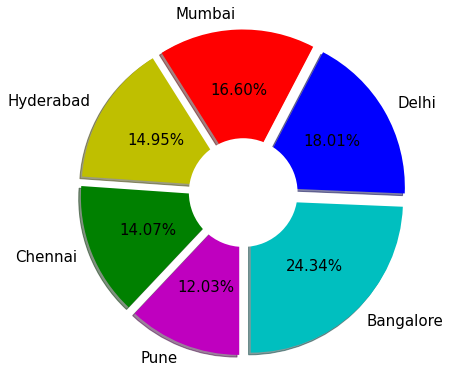

In [136]:
# Doughnut chart
plt.figure(figsize=(15,5))  #graph size

explode = [0.1,0.1,0.1,0.1,0.1,0.1] # To slice the perticuler section
colors = ["c", 'b','r','y','g','m'] # Color of each section
textprops = {"fontsize":15} # Font size of text in pie chart

plt.pie(d1['Name'], # Values
        labels = d1['City'], # Labels for each sections
        explode = explode, # To slice the perticuler section
        colors =colors, # Color of each section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.4, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops)

plt.pie([1],colors=['w'],radius=0.5)

plt.show #print graph

Most doctors are from Bangalore

#### 2) Count of doctors in each speciality

In [140]:
d2 = df2.groupby(by='Speciality_of_doctor')['Name'].count().reset_index().sort_values(by='Name',ascending=False)
d2

,Speciality_of_doctor,Name
2,Dentist,2240
6,Gynecologist,1379
11,Orthopedist,790
12,Pediatrician,727
3,Dermatologist,626
13,Physiotherapist,466
10,Ophthalmologist,411
7,Infertility Specialist,357
0,Cardiologist,345
14,Psychiatrist,266


<function matplotlib.pyplot.show(close=None, block=None)>

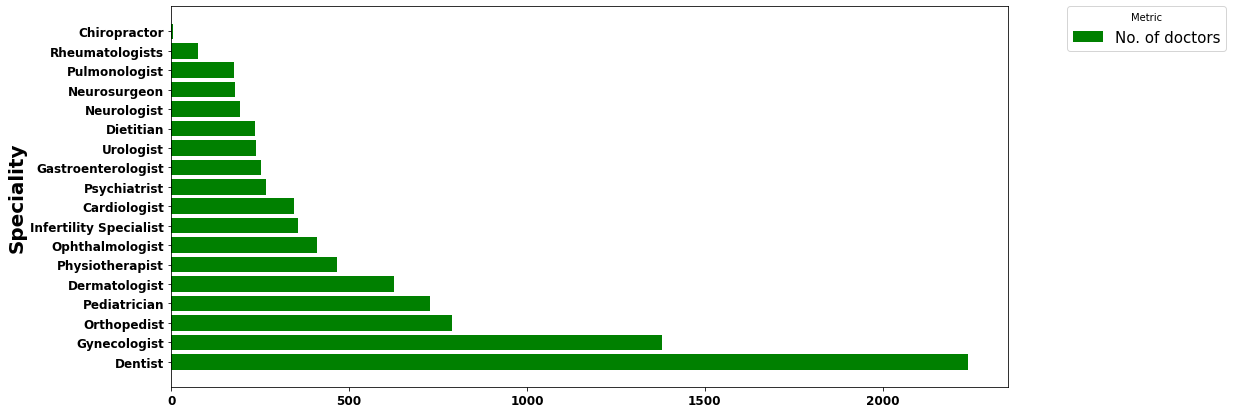

In [159]:
plt.figure(figsize=(15,7))  #graph size

plt.barh(d2['Speciality_of_doctor'],d2['Name'],color='g',label='No. of doctors',linestyle=':',linewidth=2)#assining x-y axis and other aesthetic

plt.ylabel('Speciality',fontsize=20,weight='bold') #y-axis title
plt.xticks(fontsize = 12,weight='bold')
plt.yticks(fontsize = 12,weight='bold')

plt.grid(False) #adding gridlines
plt.legend(loc='upper left', title='Metric',fontsize=15,bbox_to_anchor=(1.07, 1),borderaxespad=0)

plt.show #print graph

Most of the doctors are 'Dentist' and least 'Chiropractor'

#### 3) Number of doctors per speciality in each city

In [168]:
d3 = df2.groupby(by=['City','Speciality_of_doctor'])['Name'].count().reset_index()
d3

,City,Speciality_of_doctor,Name
0,Bangalore,Cardiologist,95
1,Bangalore,Chiropractor,4
2,Bangalore,Dentist,445
3,Bangalore,Dermatologist,166
4,Bangalore,Dietitian,34
...,...,...,...
99,Pune,Physiotherapist,53
100,Pune,Psychiatrist,30
101,Pune,Pulmonologist,12
102,Pune,Rheumatologists,5


#### 4)Heatmap

<AxesSubplot:>

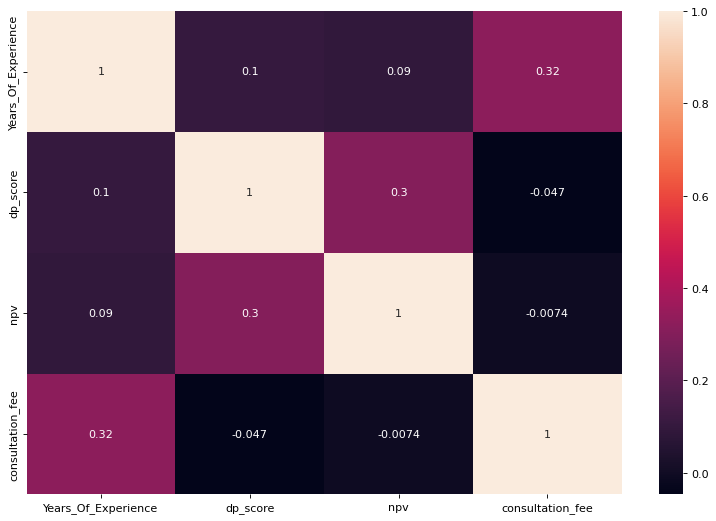

In [177]:
plt.figure(figsize=(12, 8),dpi=80)
sns.heatmap(df2.corr(), annot=True)

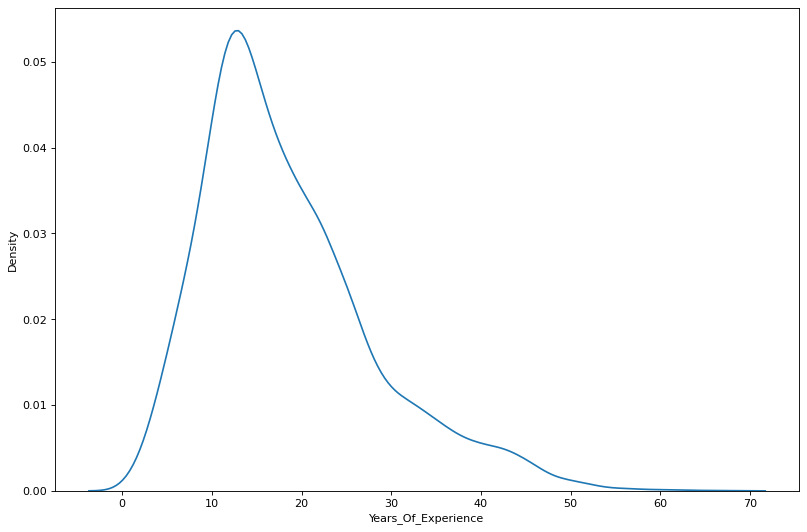

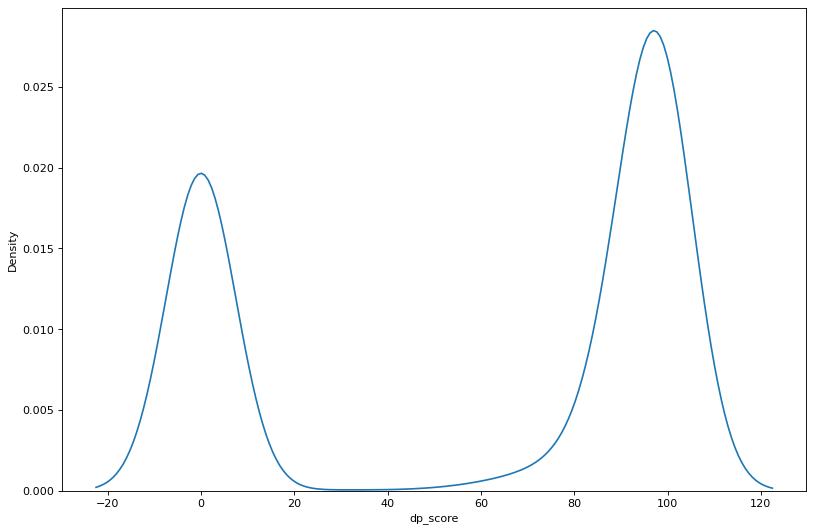

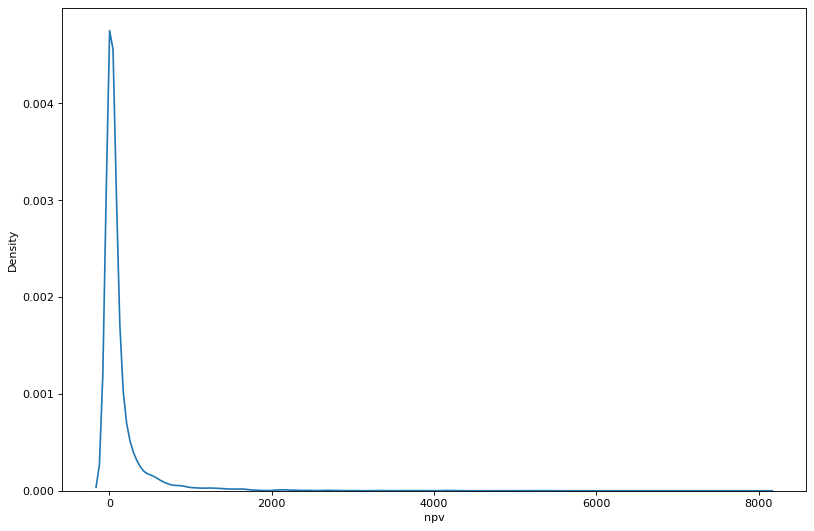

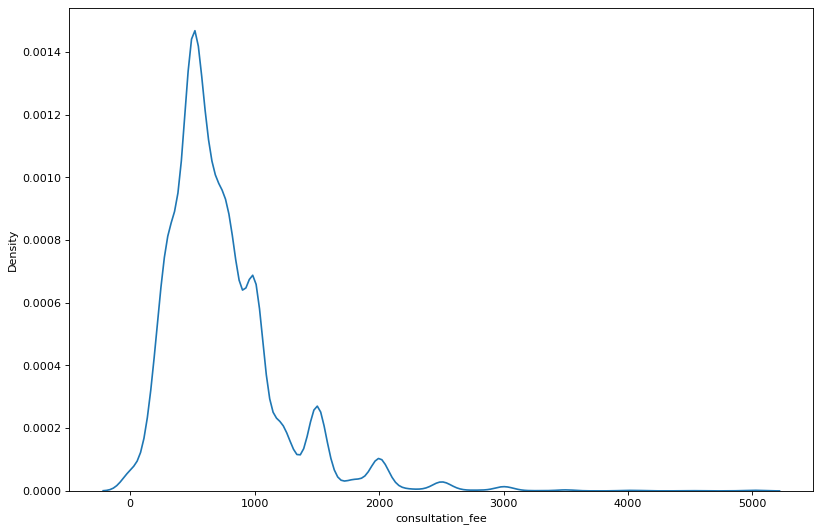

In [182]:
lis = ['Years_Of_Experience','dp_score','npv','consultation_fee']
for i in lis:
    plt.figure(figsize=(12, 8),dpi=80)
    sns.kdeplot(df2[i])